In [1]:
from fmd_evolution import *
import esm # to use the PLM ESM-2
import os # to process evaluation data from MSA file
from Bio.Align import substitution_matrices

In [2]:
# Source: https://github.com/facebookresearch/esm/tree/main?tab=readme-ov-file#esmfold
model, alphabet = esm.pretrained.load_model_and_alphabet("esm2_t33_650M_UR50D") 
batch_converter = alphabet.get_batch_converter()

In [3]:
reference_seq = 'TTSAGESADPVTATVENYGGETQVQRRQHTDIAFILDRFVKVKPKEQVNVLDLMQIPAHTLVGALLRTATYYFSDLELAVKHEGDLTWVPNGAPETALDNTTNPTAYHKEPLTRLALPYTAPHRVLATVYNGSSKYGDTSTNNVRGDLQVLAQKAERTLPTSFNFGAIKATRVTELLYRMKRAETYCPRPLLAIQPSDARHKQRIVAPAKQ'

In [4]:
modelSingleton = ModelSingleton(model=model,alphabet=alphabet,batch_converter=batch_converter)

In [5]:
# mutation strategy parameters
mutations_per_seq = 4 # cap on size of potential mutation pool
constrained_start = 138 # start of high variability region
constrained_end = 143 # end of high variability region
num_of_mutations_desired=3 # number of mutations desired after filtering with mutation score


mh_iterations = 10
mh_positions_per_seq = 6 # number of positions generated via mh
mh_mutations_per_seq = 3 # number of amino acids generated per pos

# evaluation strategy parameters
max_generations = 3
alignment_file_path = os.path.join("fmd_evolution/evaluation", "FMDV_VP1_HVR_1571seq_aln.fas") # can only be applied on predictions with constrained positions 138-143 - can I push this to my repo? or not supposed to be public?
segment = list(reference_seq)[constrained_start-1:constrained_end] # constrained segment to mutate
ref_seq_id = ''.join(segment)

In [6]:
for pos in range(constrained_start,constrained_end+1):
    print(f"Position {pos} : Amino Acid {segment[pos-constrained_start]}")

Position 138 : Amino Acid D
Position 139 : Amino Acid T
Position 140 : Amino Acid S
Position 141 : Amino Acid T
Position 142 : Amino Acid N
Position 143 : Amino Acid N


## Evolution using Metropolis Hastings Across 6 Highly Mutable Positions

In [7]:
plm = ProteinLanguageModel()
fmd_sequence = plm.create_protein_sequence(id=ref_seq_id,sequence=reference_seq) # protein sequence object generator

In [8]:
mutation_strat = MetropolisHastings(iterations=mh_iterations, mutations_per_seq=mh_mutations_per_seq, start_pos=constrained_start,end_pos=constrained_end) # to generate pool of mutations
ranked_eval_strat = RankedEvaluationStrategy(root_sequence = fmd_sequence) # to score and to filter pool of mutations
evolution = Evolution(
    root_sequence = fmd_sequence,
    mutation_strategy = mutation_strat,
    ranked_evaluation_strategy = ranked_eval_strat,
    max_generations=max_generations)

In [9]:
evolution.evolve_sequence_with_ranking()

Constrained seq = DTSTNN
Previously mutated positions = []
Same mutation at 137: D → D
Same mutation at 138: T → T
Same mutation at 139: S → S
Same mutation at 140: T → T
Same mutation at 141: N → N
Same mutation at 142: N → N
Len possible_mutations = 114
Len probability distro = 114
Pool of potential mutations: [('S', 139, 'K'), ('N', 141, 'T'), ('S', 139, 'Q')]
Mutation scores: [1, 3, 2]
Softmax scores: [0.6652409  0.09003057 0.24472845]
Viable mutations: [<fmd_evolution.protein_sequence.ProteinSequence object at 0x7525500e0b50>
Constrained seq = DTKTNN
Previously mutated positions = [139]
Same mutation at 137: D → D
Same mutation at 138: T → T
Same mutation at 140: T → T
Same mutation at 141: N → N
Same mutation at 142: N → N
Len possible_mutations = 95
Len probability distro = 95
Pool of potential mutations: [('T', 138, 'N'), ('T', 138, 'E'), ('D', 137, 'T')]
Mutation scores: [4, 2, 0]
Softmax scores: [0.01587624 0.11731043 0.86681336]
Viable mutations: [<fmd_evolution.protein_sequ

In [10]:
# evolution.evolve_sequence() # positions are 0-indexed, adjusted later for graph, fitness landscape, mutation score z axis, y axis pos 1 (all possible aas), y pos 2 (same), order the aminoa cids correctly! using embeddings for what's similar/close

/home/ilmmbis/anaconda3/envs/evolocity_env/lib/python3.7/site-packages/networkx/drawing/layout.py:727: RuntimeWarning: divide by zero encountered in true_divide
  costargs = (np, 1 / (dist_mtx + np.eye(dist_mtx.shape[0]) * 1e-3), meanwt, dim)


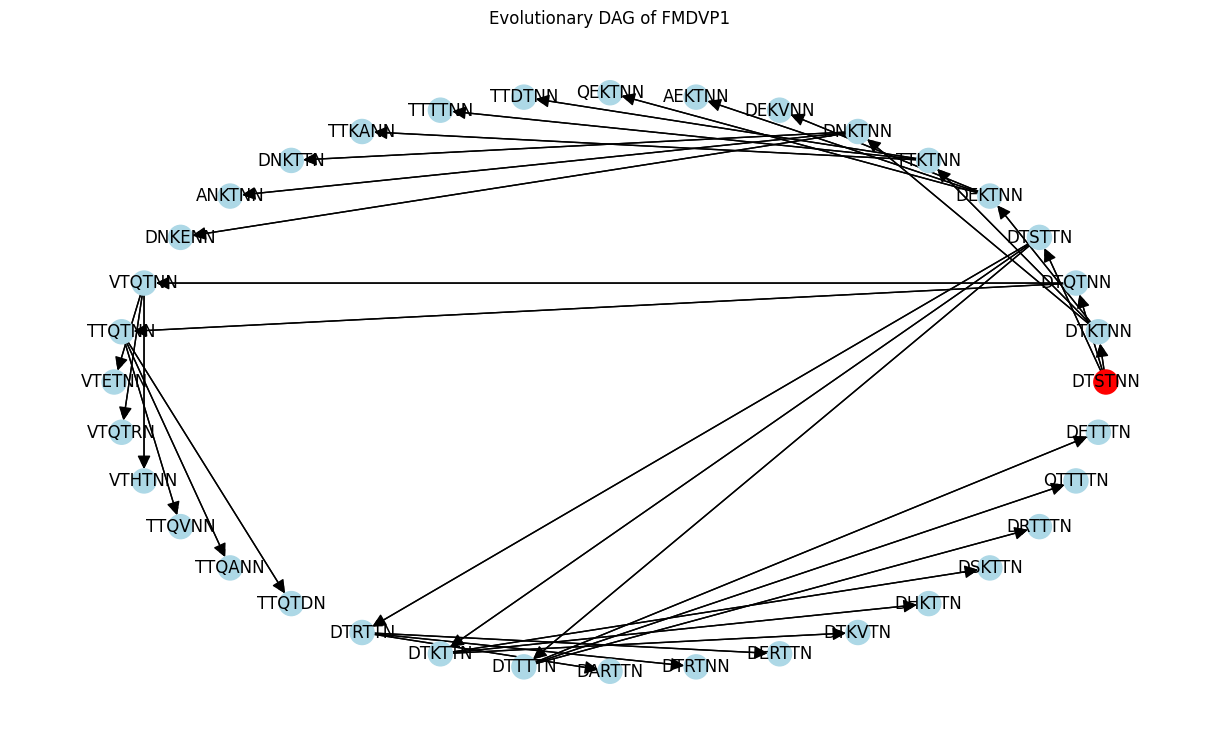

In [11]:
evolution.visualise_graph() 

In [12]:
sorted_paths = evolution.get_best_paths_in_order() # paths to leaf nodes only
num_of_paths = len(sorted_paths)
print(f"Number of paths generated: {num_of_paths}") # sorted by mean mutation score for path

Mutation scores for path ['DTSTNN', 'DTKTNN', 'DEKTNN', 'DEKVNN']: [1000, 1, 2, 2]
Mutation scores for path ['DTSTNN', 'DTKTNN', 'DEKTNN', 'AEKTNN']: [1000, 1, 2, 2]
Mutation scores for path ['DTSTNN', 'DTKTNN', 'DEKTNN', 'QEKTNN']: [1000, 1, 2, 2]
Mutation scores for path ['DTSTNN', 'DTKTNN', 'TTKTNN', 'TTDTNN']: [1000, 1, 0, 2]
Mutation scores for path ['DTSTNN', 'DTKTNN', 'TTKTNN', 'TTTTNN']: [1000, 1, 0, 1]
Mutation scores for path ['DTSTNN', 'DTKTNN', 'TTKTNN', 'TTKANN']: [1000, 1, 0, 3]
Mutation scores for path ['DTSTNN', 'DTKTNN', 'DNKTNN', 'DNKTTN']: [1000, 1, 4, 1]
Mutation scores for path ['DTSTNN', 'DTKTNN', 'DNKTNN', 'ANKTNN']: [1000, 1, 4, 2]
Mutation scores for path ['DTSTNN', 'DTKTNN', 'DNKTNN', 'DNKENN']: [1000, 1, 4, 3]
Mutation scores for path ['DTSTNN', 'DTQTNN', 'VTQTNN', 'VTETNN']: [1000, 2, 1, 2]
Mutation scores for path ['DTSTNN', 'DTQTNN', 'VTQTNN', 'VTQTRN']: [1000, 2, 1, 2]
Mutation scores for path ['DTSTNN', 'DTQTNN', 'VTQTNN', 'VTHTNN']: [1000, 2, 1, 2]
Muta

Path 0 average mutation score: 250.5


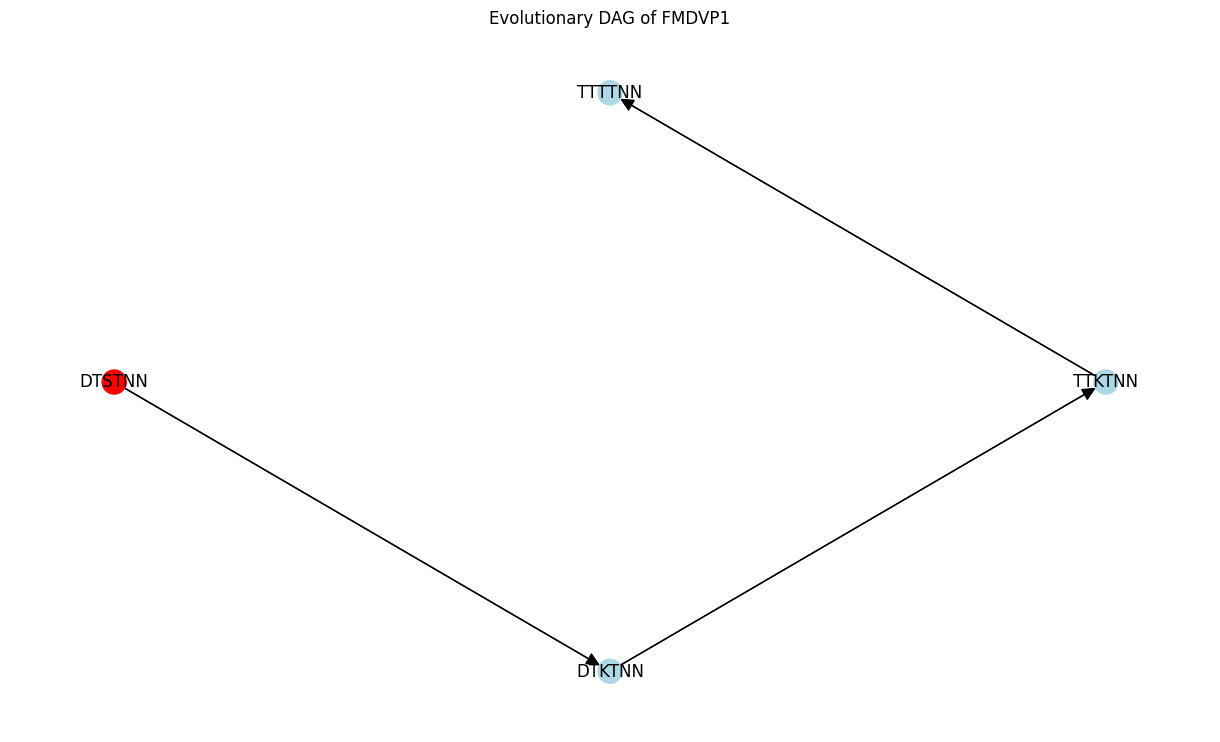

Path 1 average mutation score: 250.75


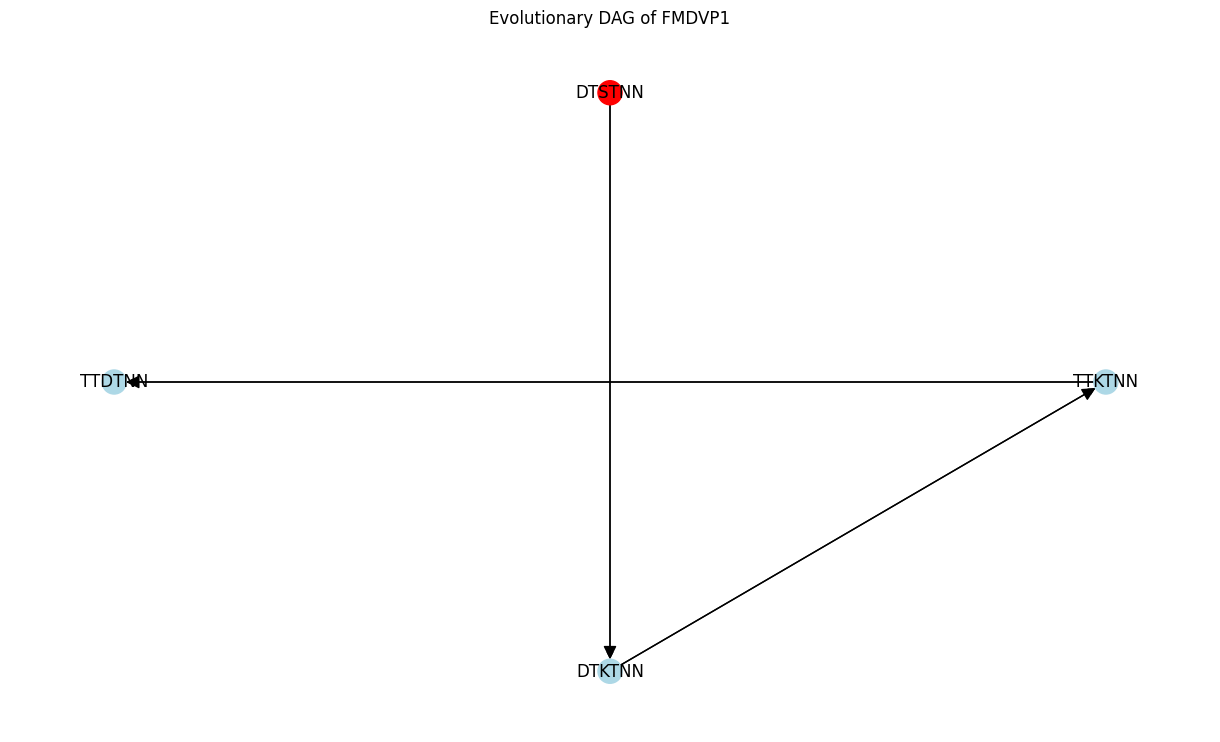

Path 2 average mutation score: 251.0


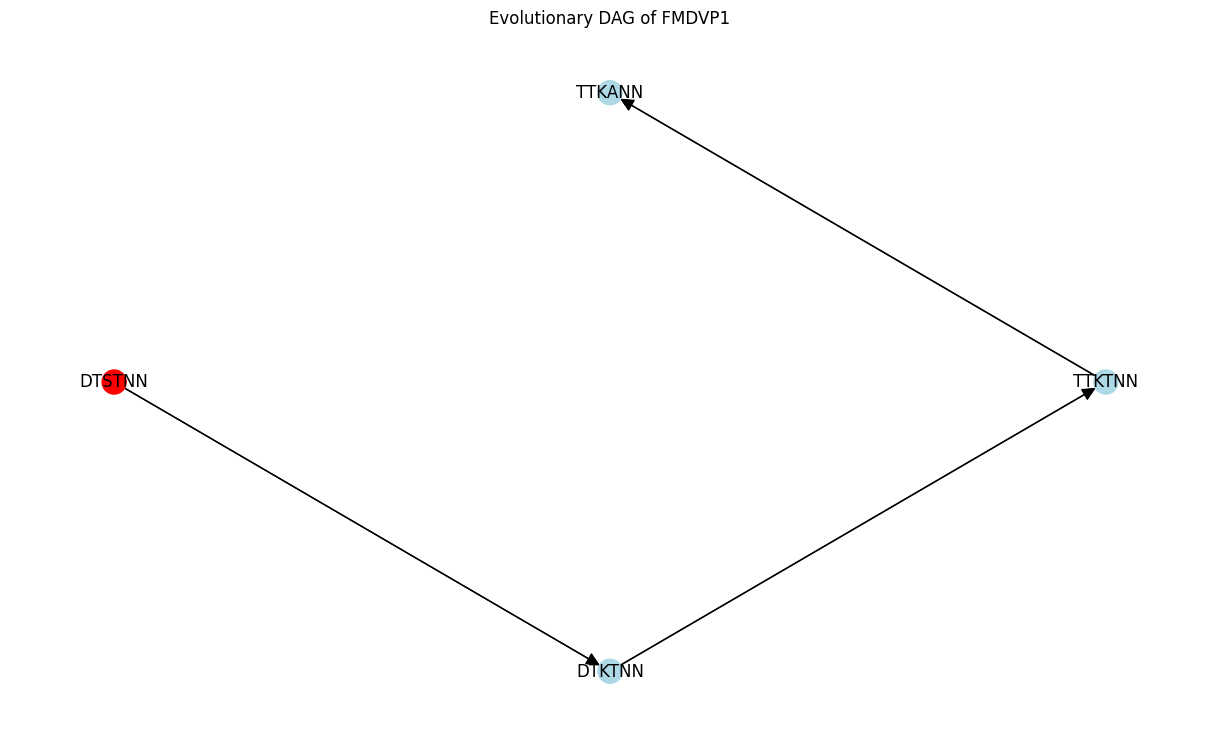

Path 3 average mutation score: 251.0


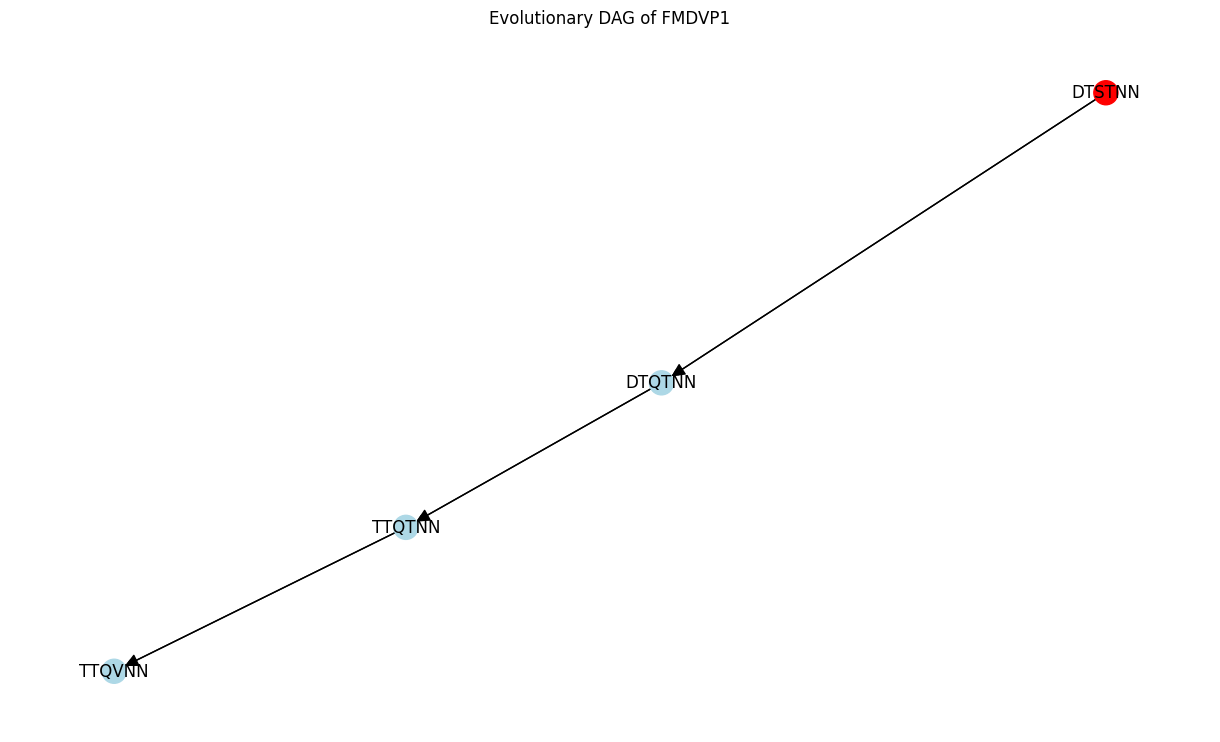

Path 4 average mutation score: 251.0


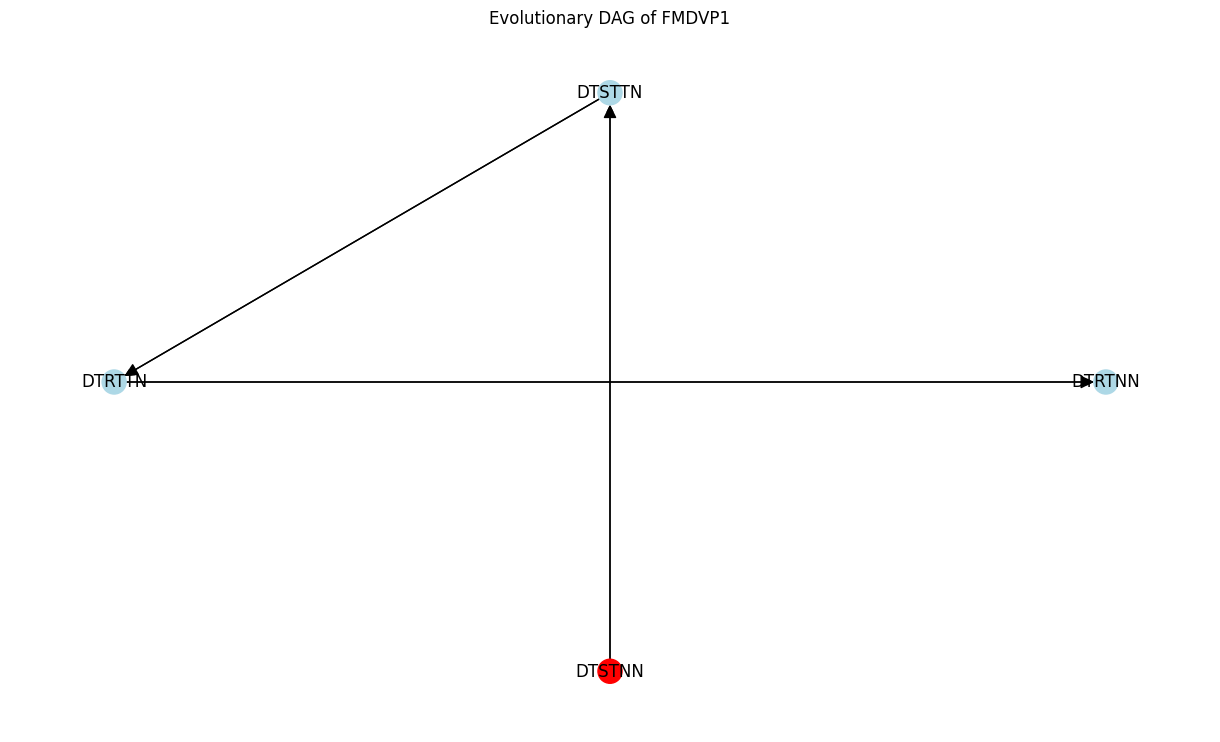

Path 5 average mutation score: 251.25


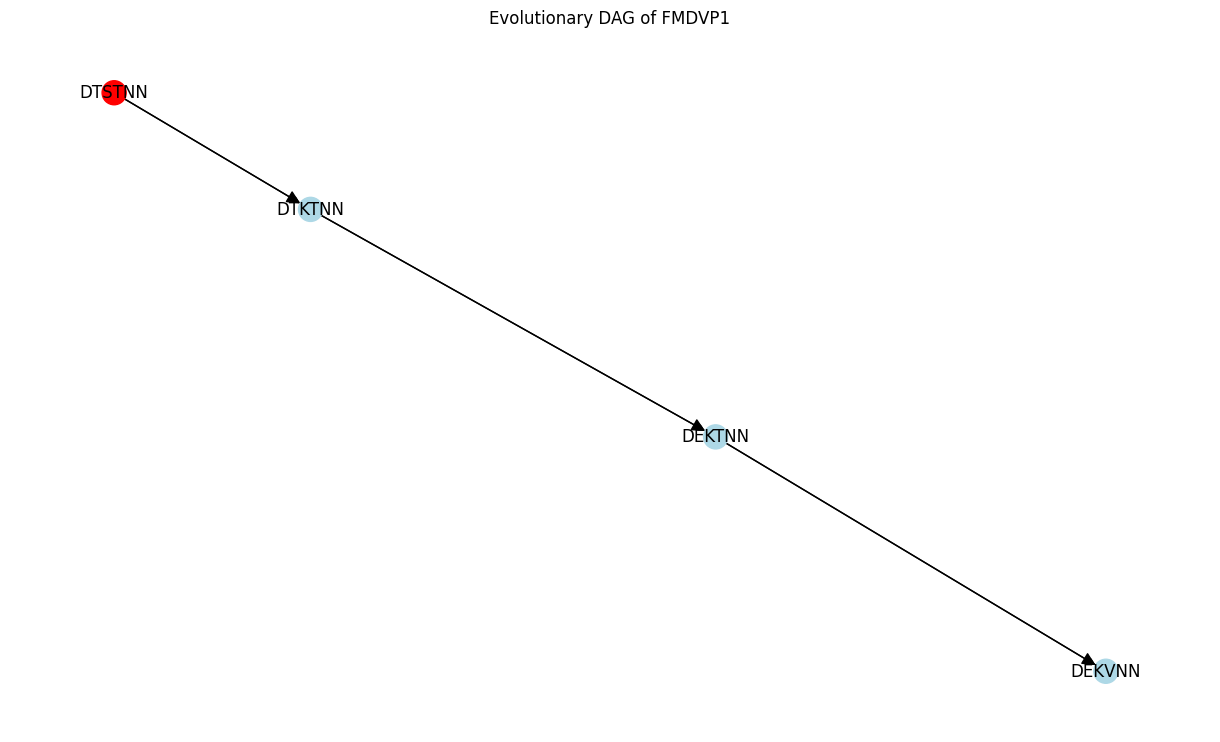

Path 6 average mutation score: 251.25


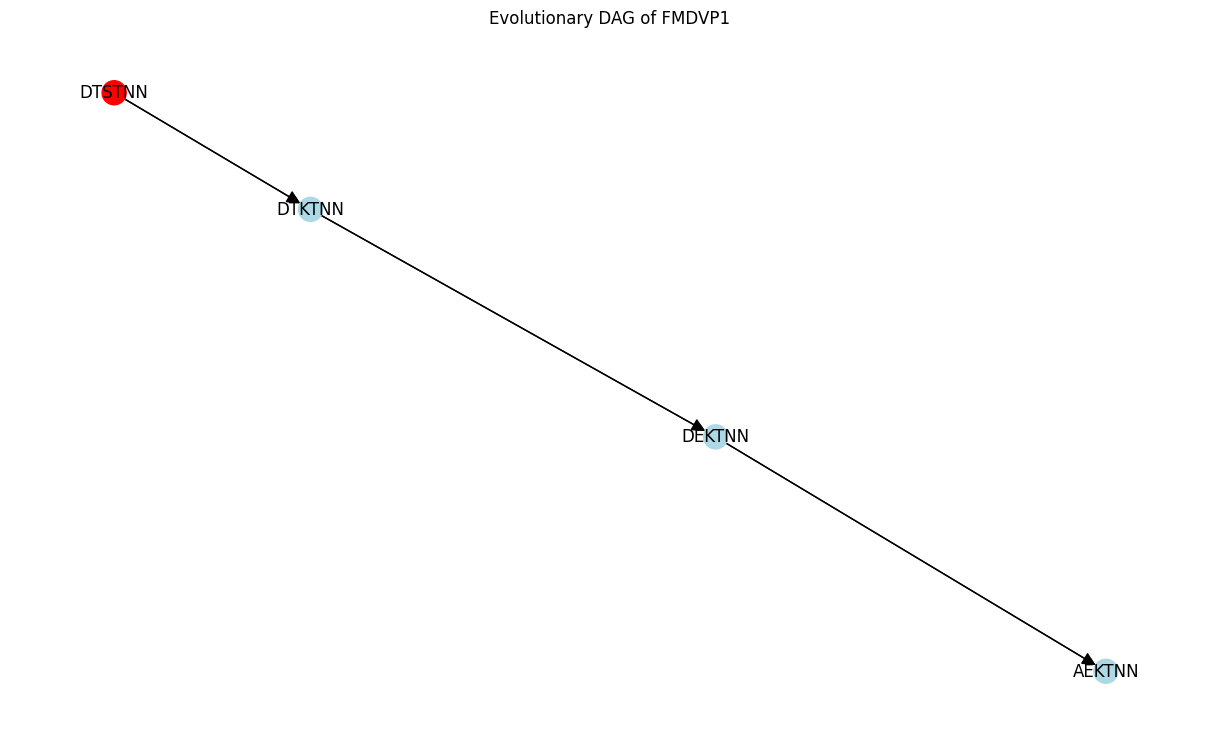

Path 7 average mutation score: 251.25


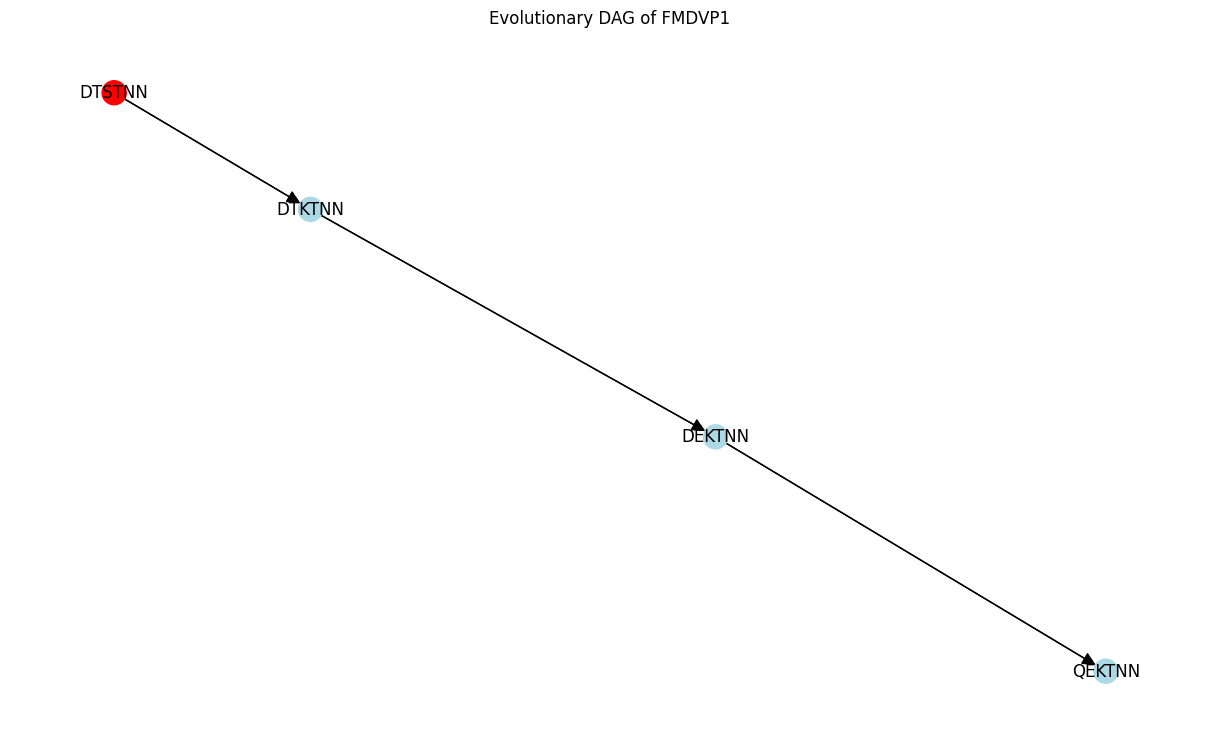

Path 8 average mutation score: 251.25


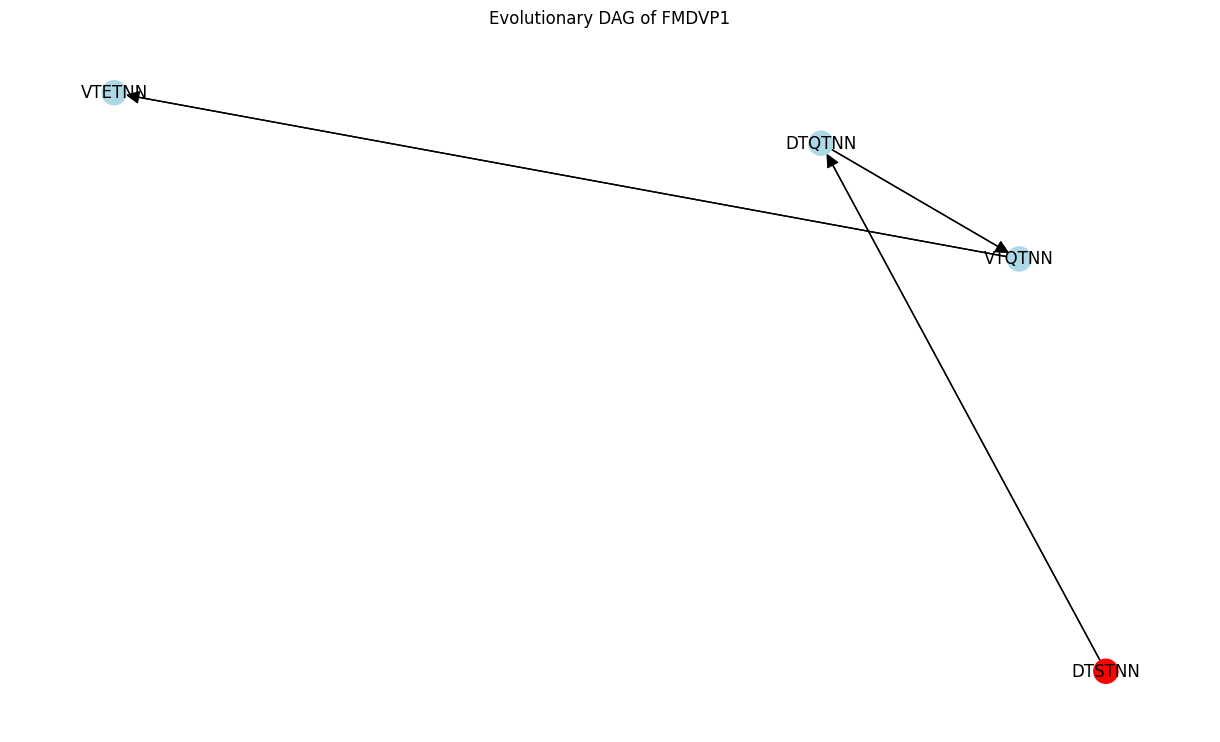

Path 9 average mutation score: 251.25


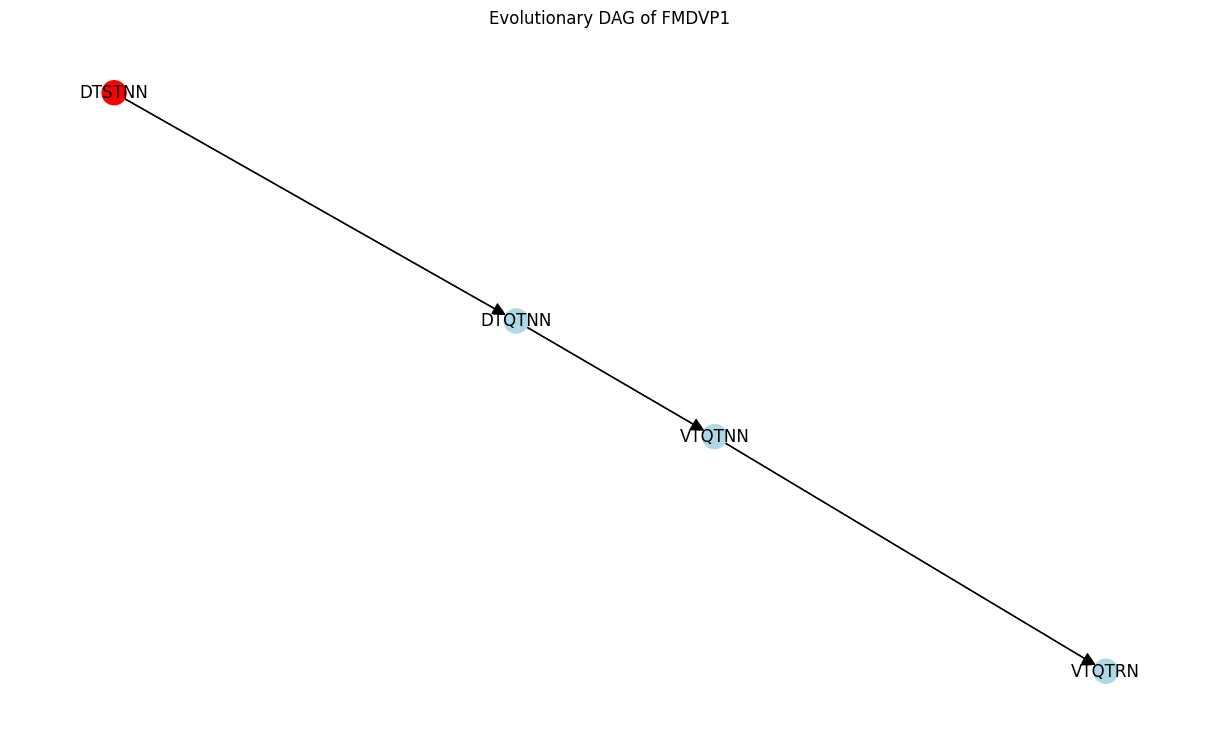

Path 10 average mutation score: 251.25


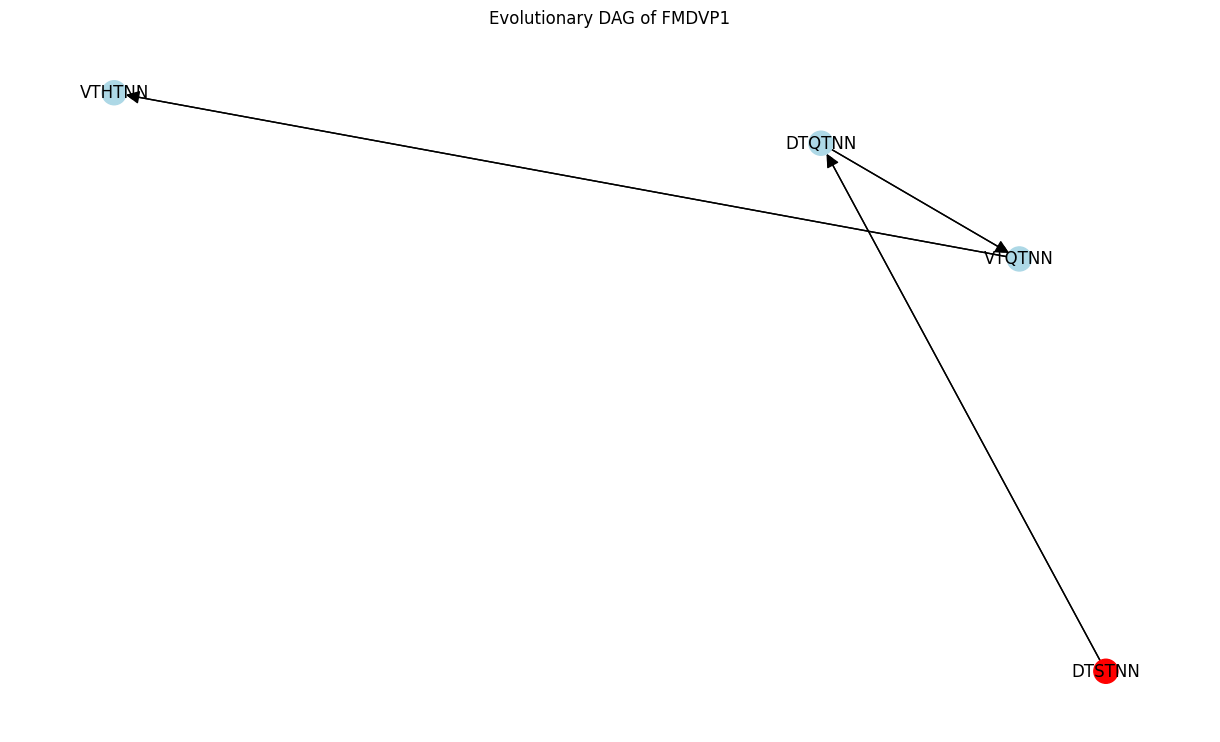

Path 11 average mutation score: 251.25


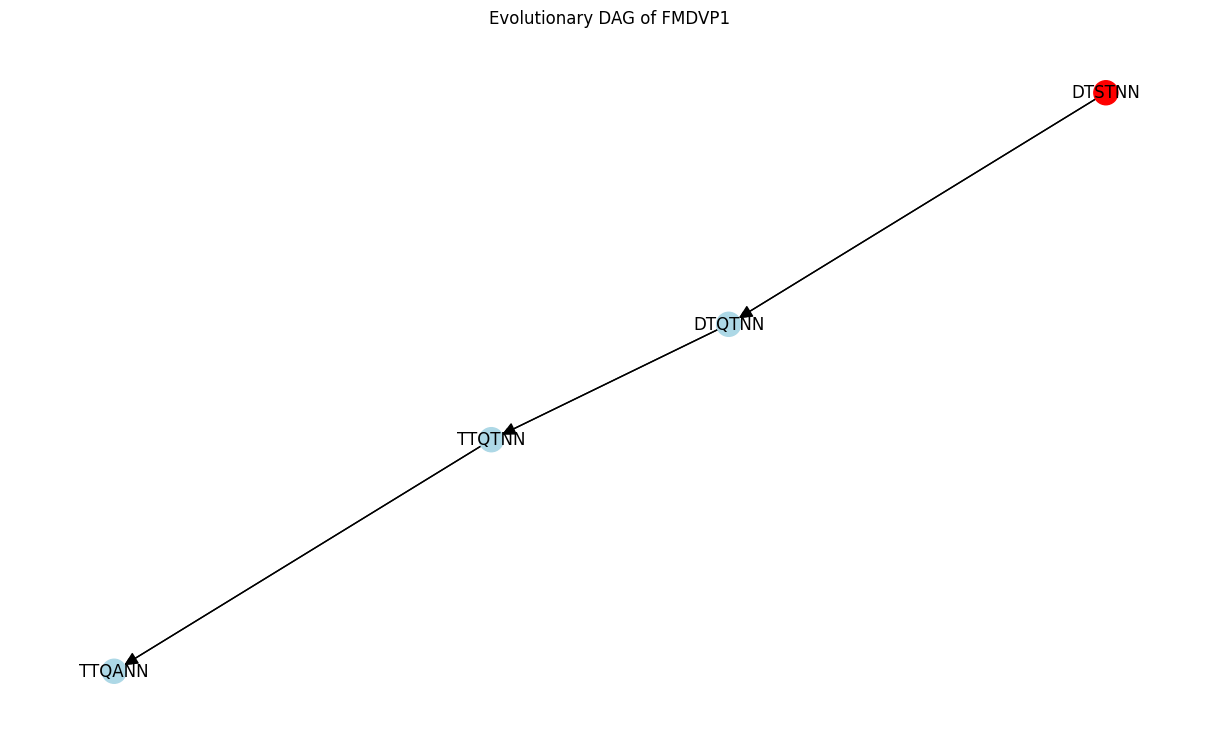

Path 12 average mutation score: 251.25


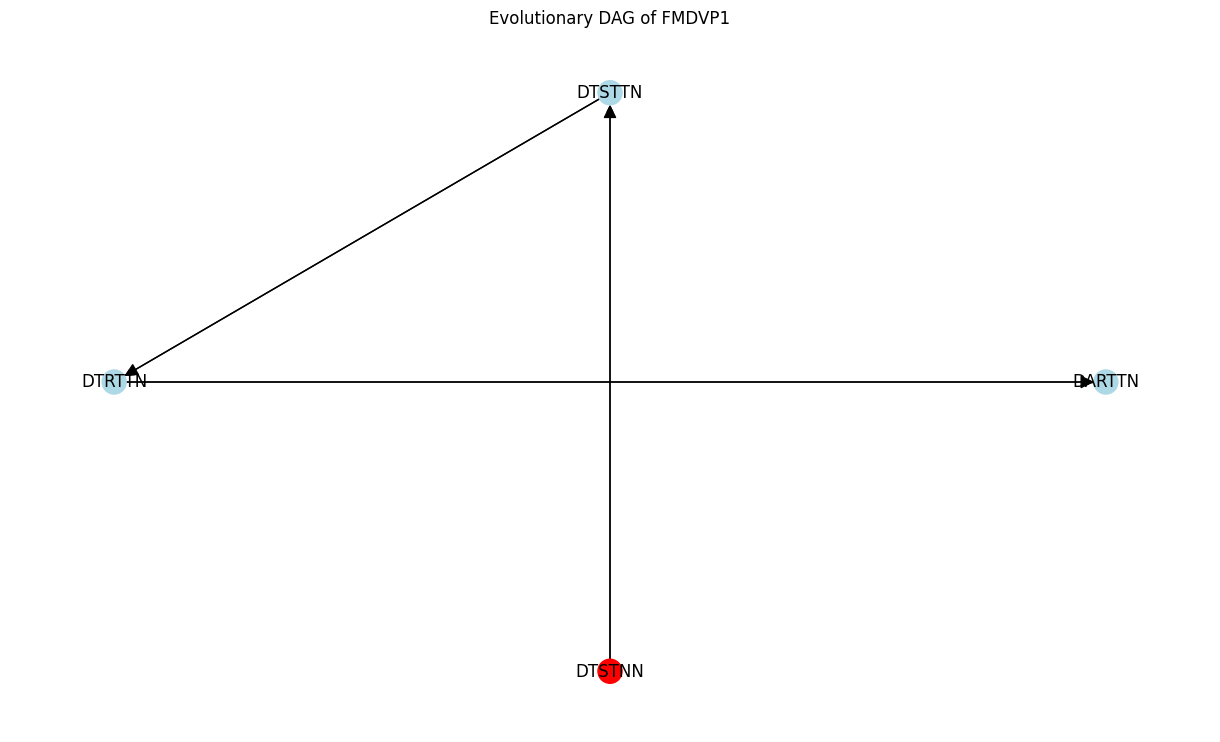

Path 13 average mutation score: 251.25


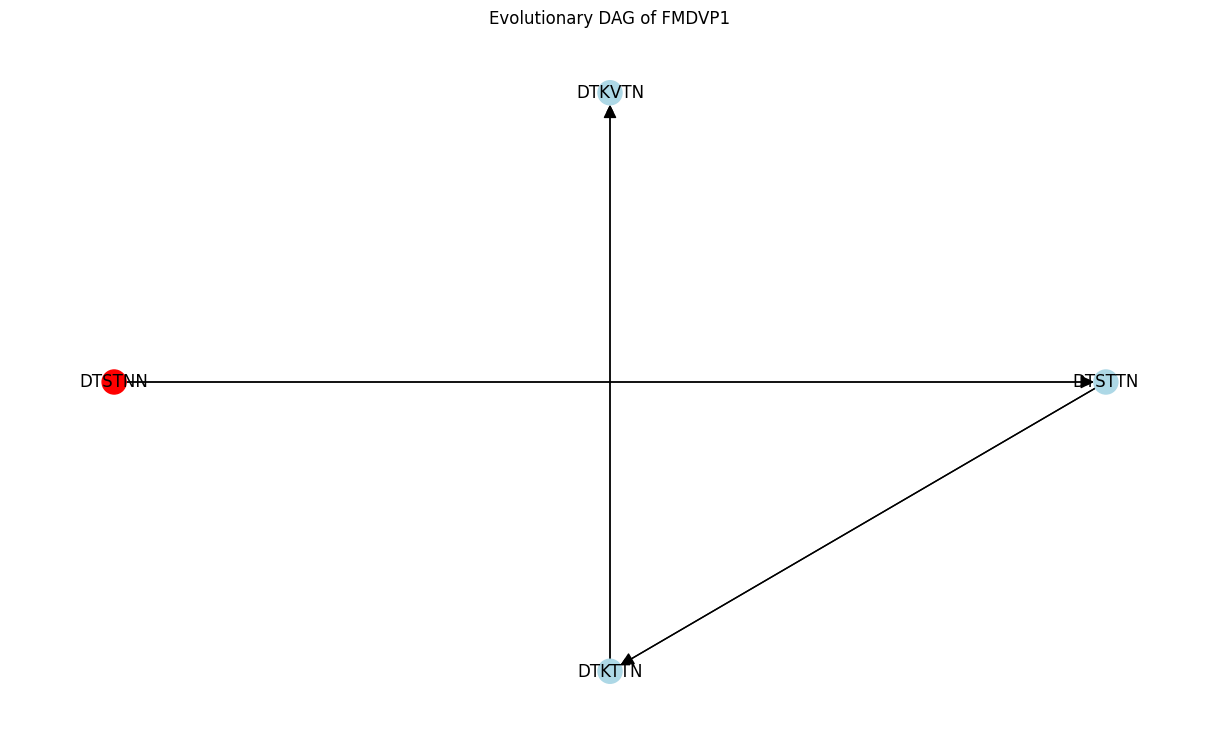

Path 14 average mutation score: 251.5


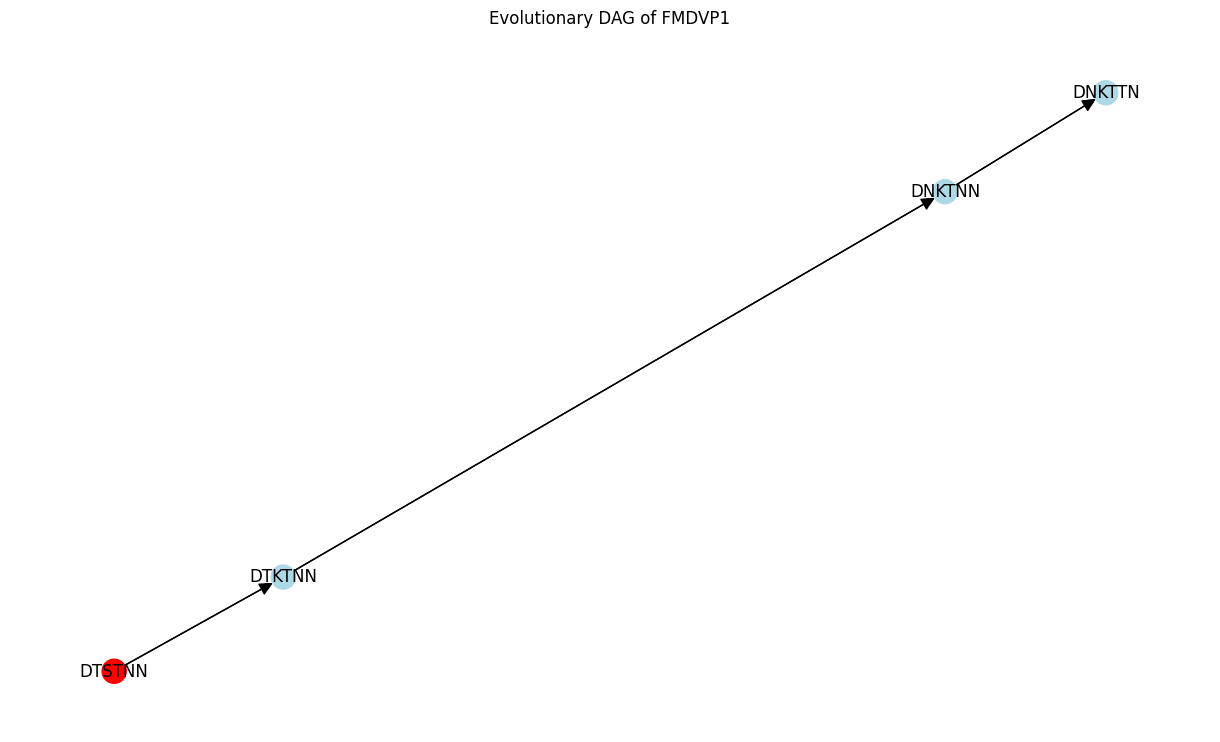

Path 15 average mutation score: 251.5


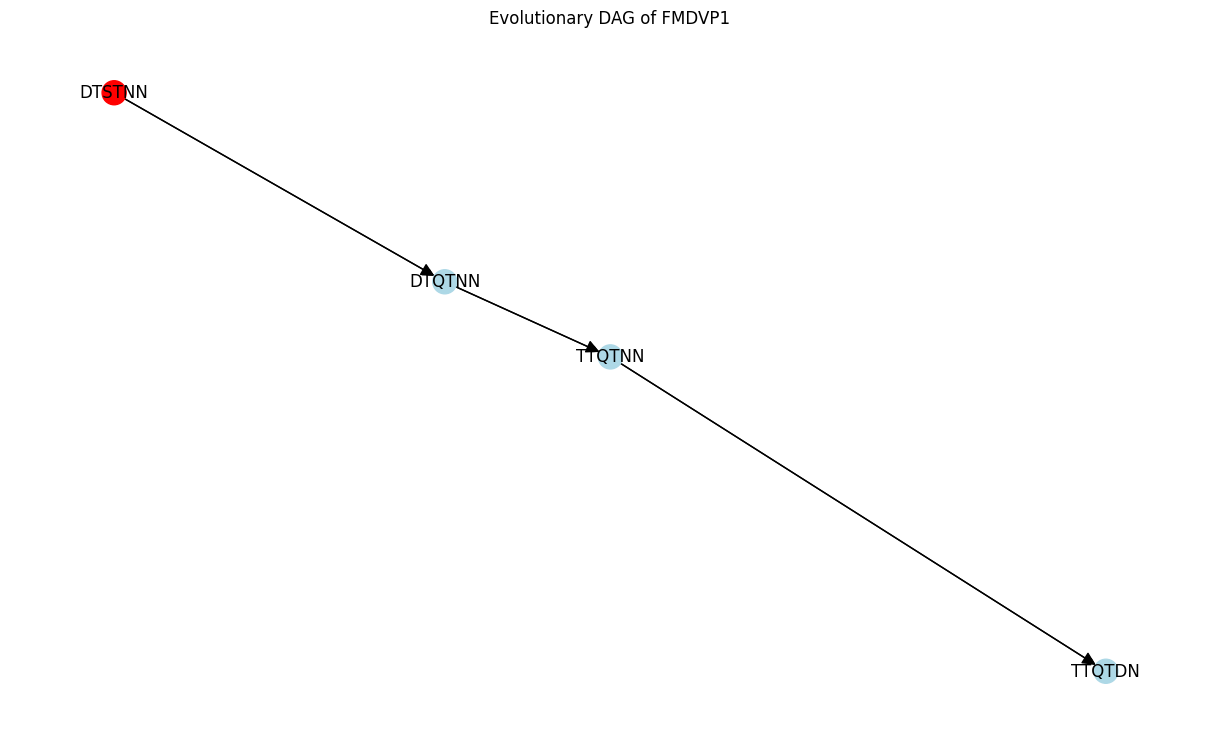

Path 16 average mutation score: 251.5


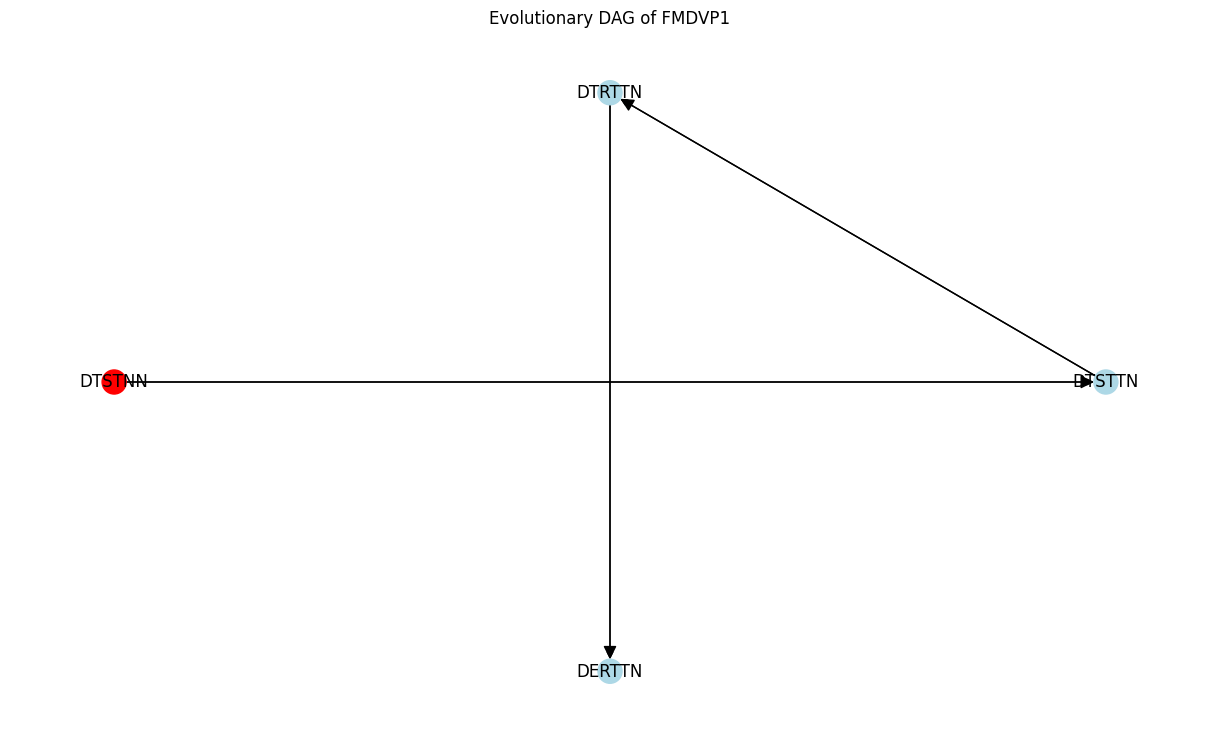

Path 17 average mutation score: 251.75


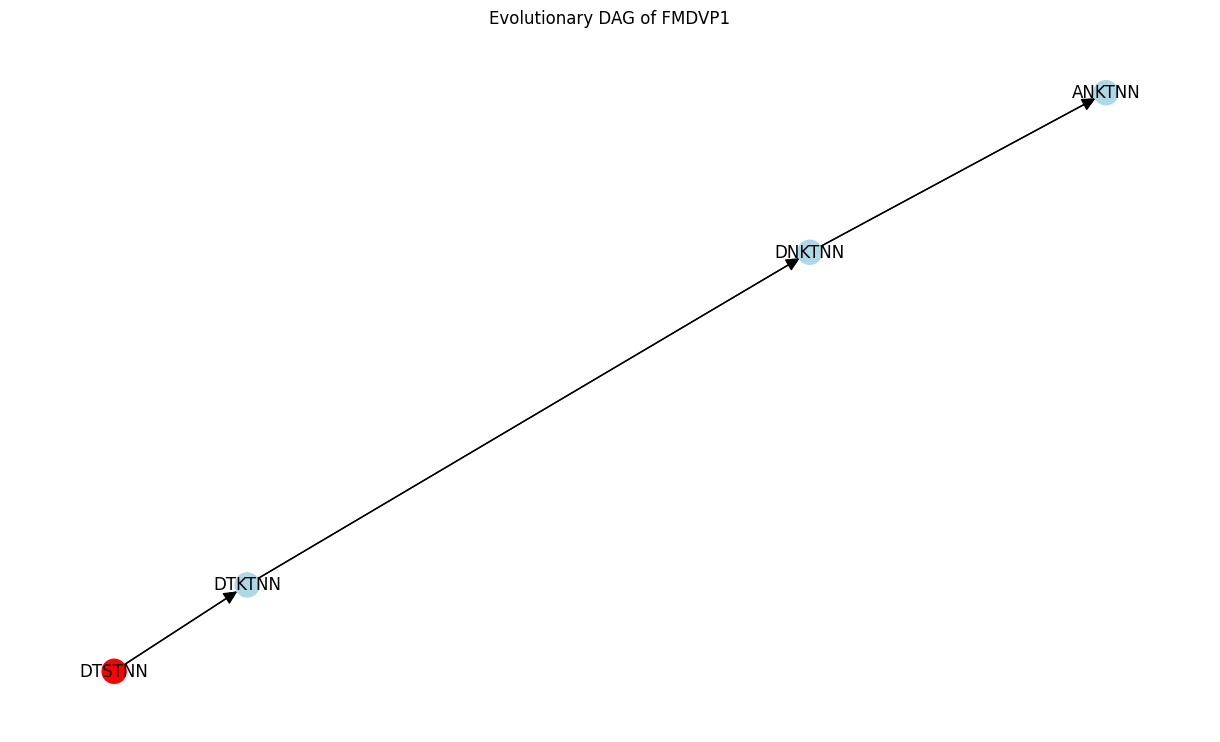

Path 18 average mutation score: 251.75


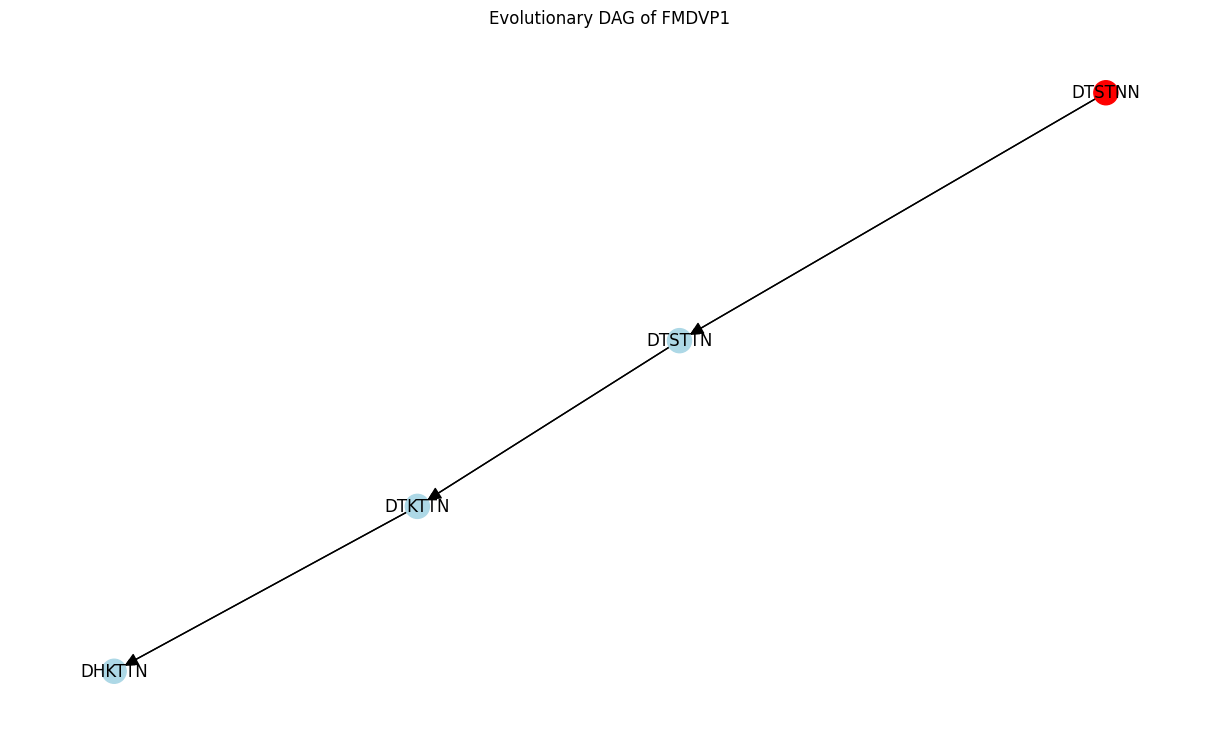

Path 19 average mutation score: 251.75


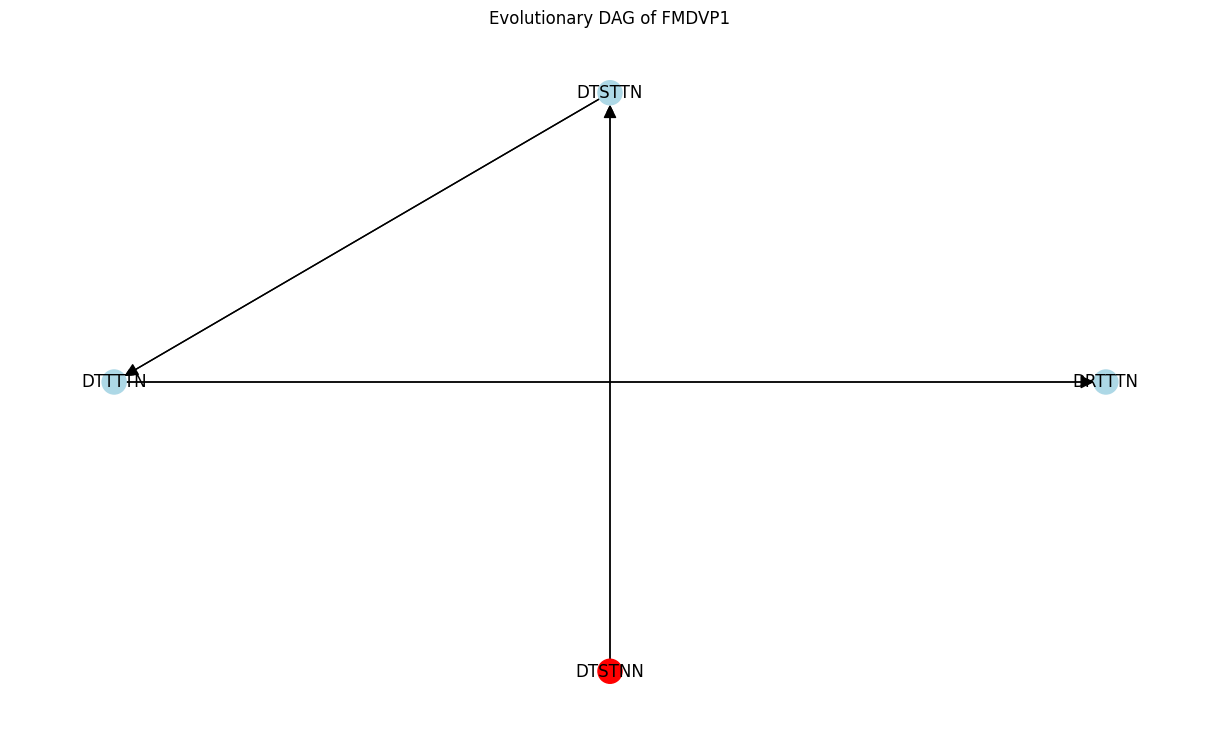

Path 20 average mutation score: 252.0


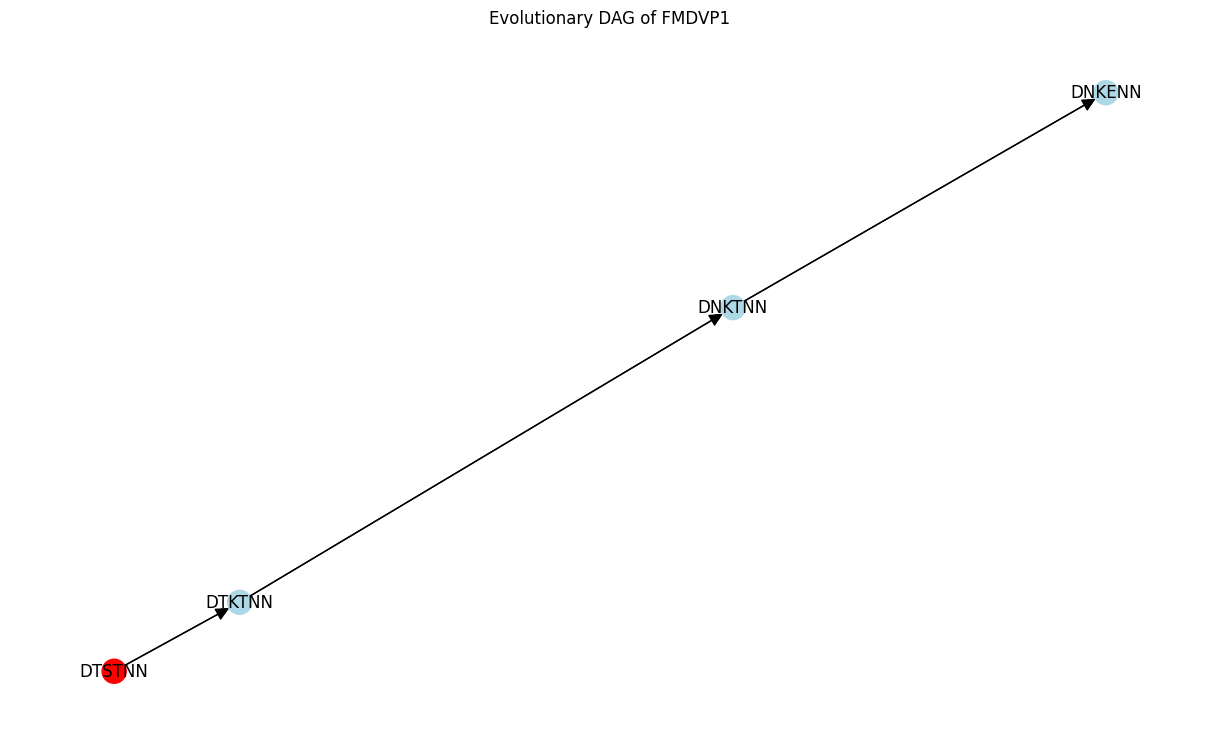

Path 21 average mutation score: 252.25


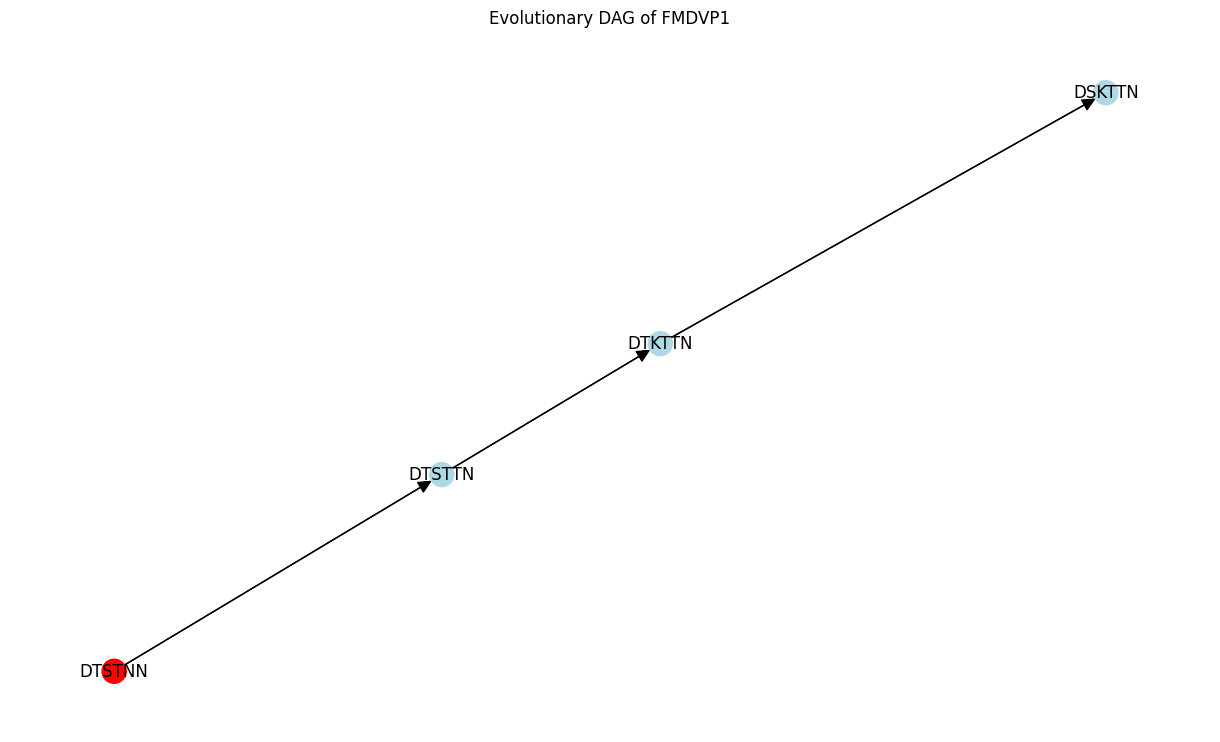

Path 22 average mutation score: 252.25


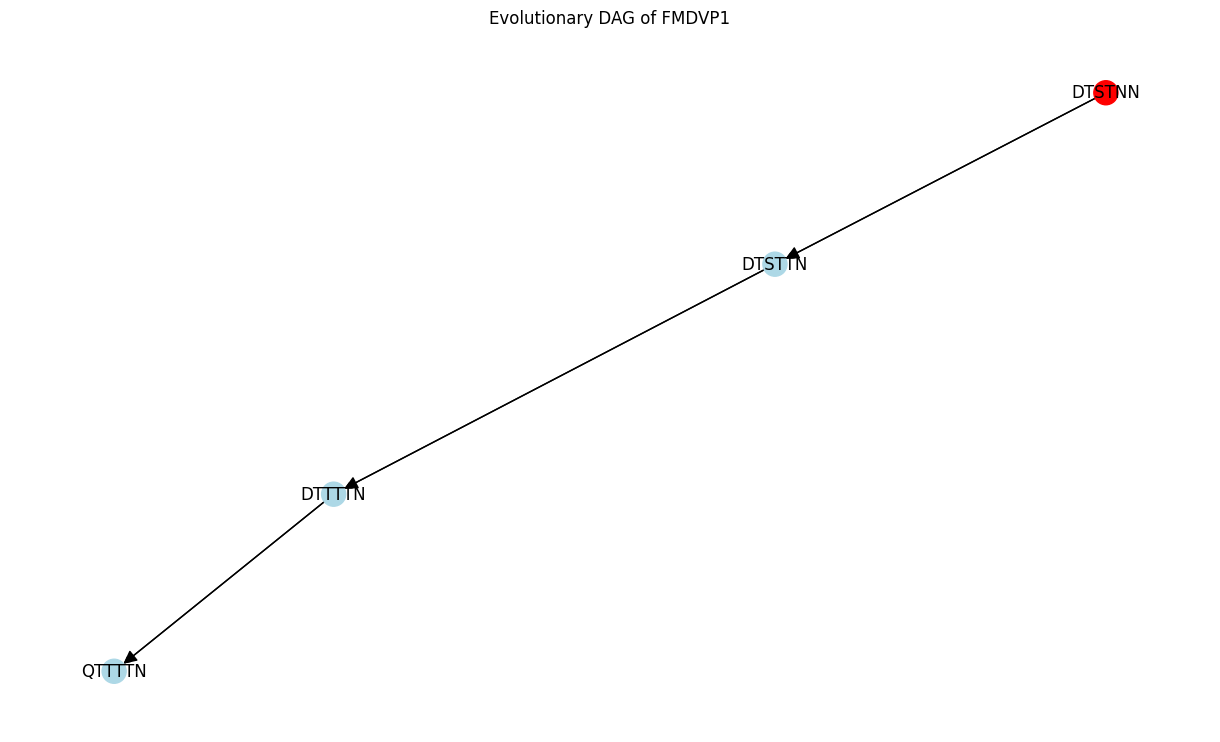

Path 23 average mutation score: 252.75


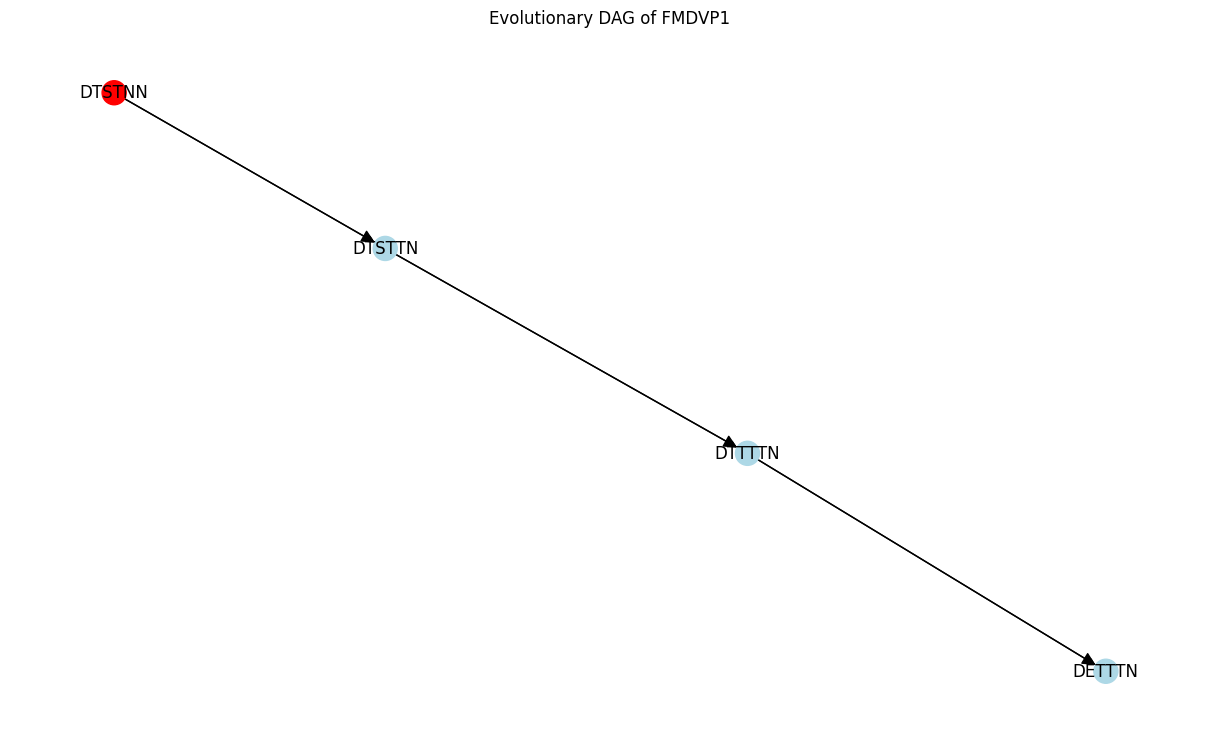

In [13]:
for i in range(num_of_paths):
    average_mutation_score,path = sorted_paths[i]
    print(f"Path {i} average mutation score: {average_mutation_score}")
    evolution.visualise_graph(path)

In [16]:
evaluator = Evaluation(
    tree = evolution.G,
    alignment_file_path = alignment_file_path,
    start_pos = constrained_start,
    ref_seq_id = ref_seq_id
)
top_k = min(10,num_of_paths)
paths = [path for av_mutation_score,path in sorted_paths][:top_k] 

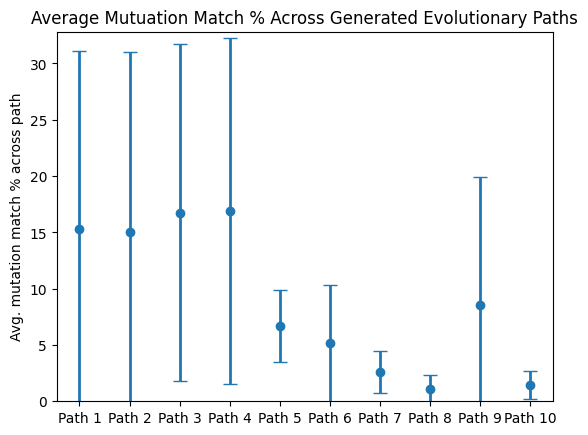

In [17]:
means, std_devs = evaluator.get_paths_metric_data(paths)
evaluator.plot_path_mutation_matches(top_k,means,std_devs)

## Evolution using Metropolis Hastings Across All 212 Positions

In [15]:
min_pos = 1
max_pos = 212

In [16]:
fmd_sequence = ProteinSequence("base",reference_seq)
eval_strat = EvaluationStrategy(root_sequence = fmd_sequence)
mutation_strat = mutation_strat = MetropolisHastings(iterations=mh_iterations, positions_per_seq=mh_positions_per_seq, mutations_per_seq=mh_mutations_per_seq, start_pos=min_pos,end_pos=max_pos)
evolution = Evolution(
    root_sequence = fmd_sequence,
    mutation_strategy = mutation_strat,
    evaluation_strategy = eval_strat,
    max_generations=max_generations)

TypeError: __init__() missing 1 required positional argument: 'ranked_evaluation_strategy'

In [ ]:
evolution.evolve_sequence() 

In [ ]:
evolution.visualise_graph() 

In [ ]:
sorted_best_paths = evolution.get_best_paths_in_order() # paths to leaf nodes only
print(f"Number of paths generated: {len(sorted_best_paths)}") # sorted by mean mutation score for path

In [ ]:
best_path = sorted_best_paths[0][1]
evolution.visualise_graph(best_path)

In [ ]:
worst_path = sorted_best_paths[-1][1]
evolution.visualise_graph(worst_path)

## Evolution using Mininimum and Maximum Logits Across 6 Highly Mutable Positions

In [19]:
fmd_sequence = ProteinSequence("base",reference_seq)
eval_strat = EvaluationStrategy(root_sequence=fmd_sequence)
mutation_strat = MinLogitPosSub(mutations_per_seq=mutations_per_seq,start_pos=constrained_start,end_pos=constrained_end)
evolution = Evolution(
    root_sequence = fmd_sequence,
    mutation_strategy = mutation_strat,
    evaluation_strategy = eval_strat,
    max_generations=max_generations)
evolution.process_alignment_data(file_path) # process alignment data

array(['DTSTNN', 'DTSTNN', 'DTSTNN', ..., '------', '-VSGSS', 'DVTA--'],
      dtype='<U6')

In [20]:
evolution.evolve_sequence()  

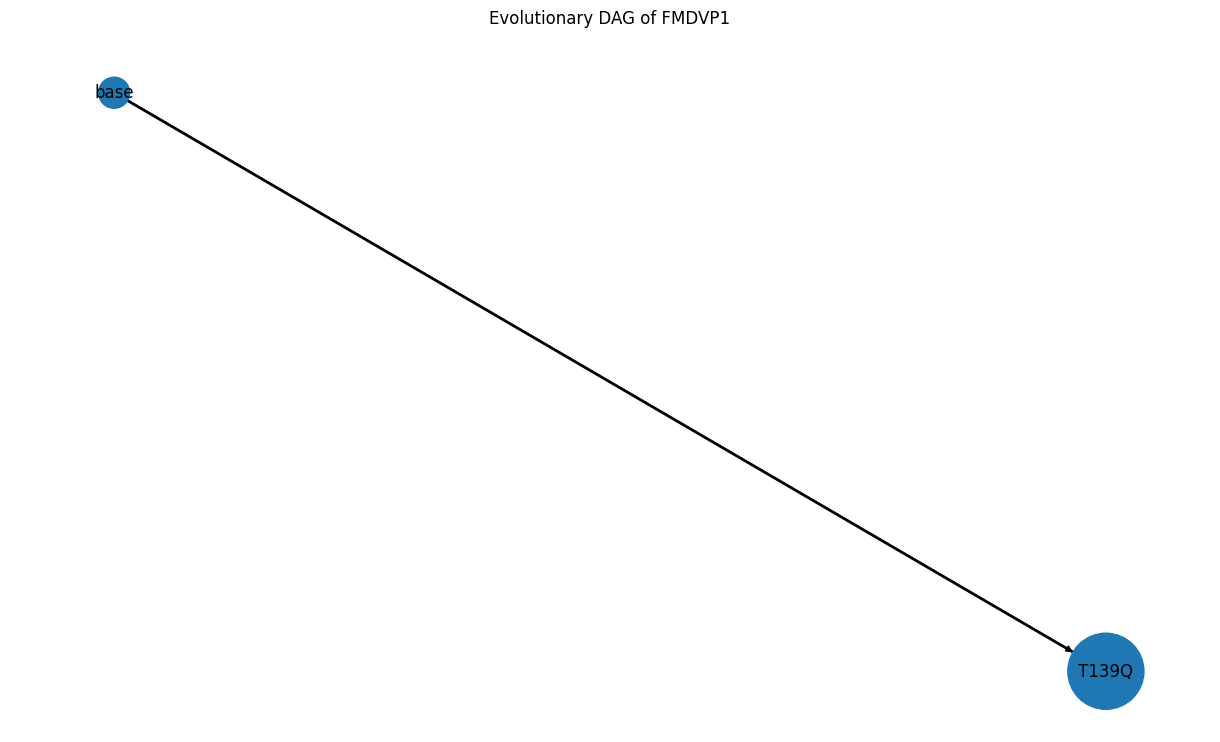

In [21]:
evolution.visualise_graph() 

In [22]:
sorted_best_paths = evolution.get_best_paths_in_order() # paths to leaf nodes only
print(f"Number of paths generated: {len(sorted_best_paths)}") # sorted by mean mutation score for path
# improve evaluation and leave it to filter out potential mutations rather than hardsetting, accept/reject policy, 
# what if i generate 100 different paths, what's the most likely paths that come up? rank these paths, want a population of possible paths  
# use alignments to assess closeness to actual path - ways to evaluate this and quantify the difference 

Number of paths generated: 1


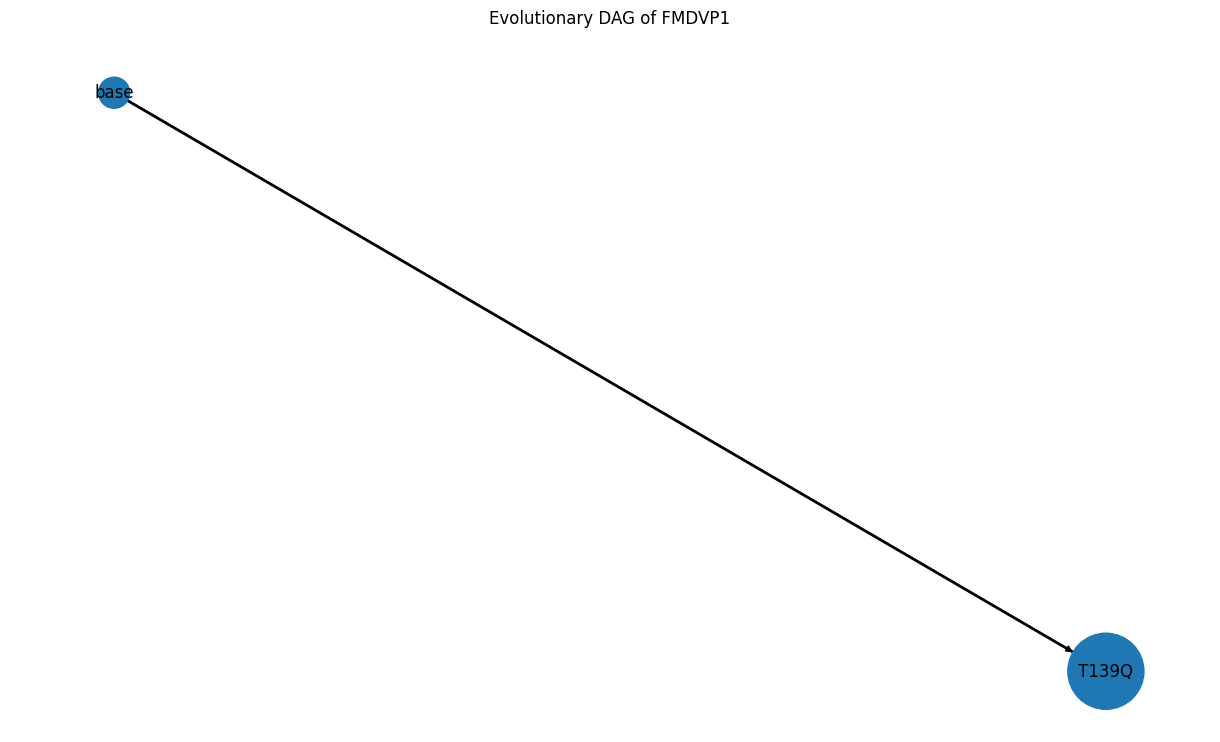

Percentage of mutation matches for base: n/a (root sequence)
% of full segment matches for base: 0.637
% of mutation matches for T139Q: 4.201
% of full segment matches for T139Q: 0.0


In [23]:
best_path = sorted_best_paths[0][1]
evolution.visualise_graph(best_path)
evolution.evaluate_path_using_alignments(evolutionary_path=best_path)

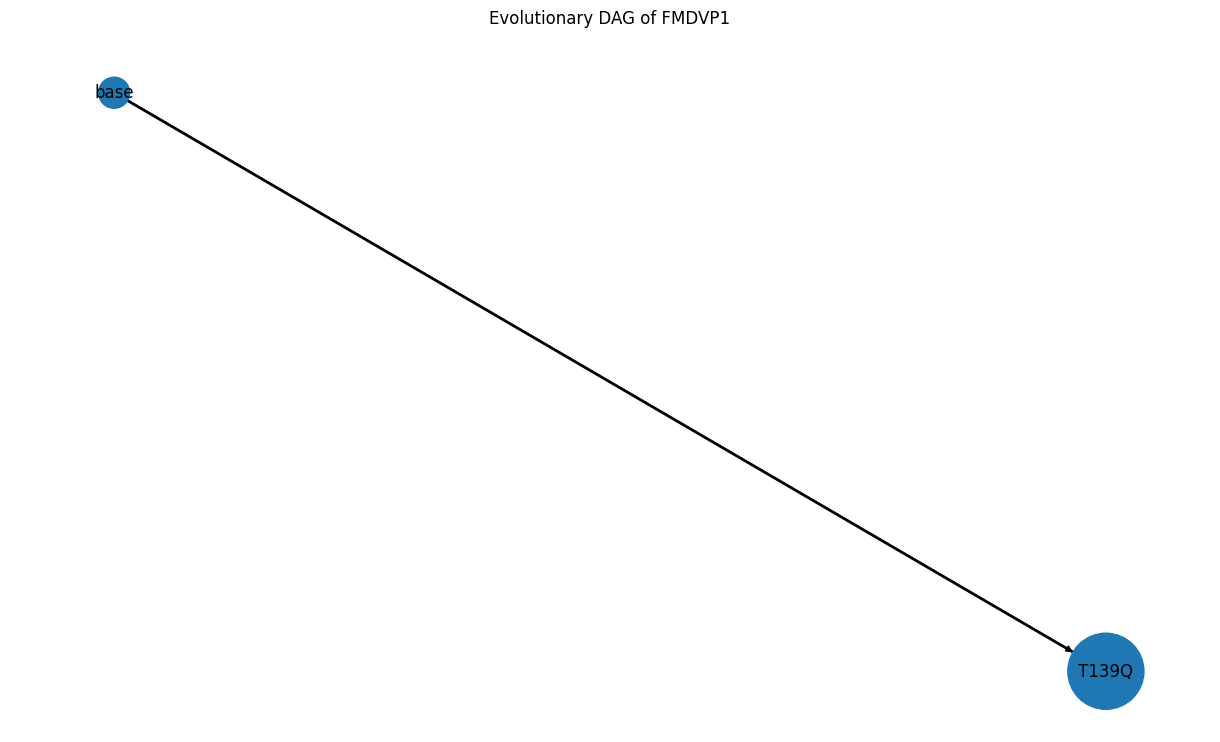

Percentage of mutation matches for base: n/a (root sequence)
% of full segment matches for base: 0.637
% of mutation matches for T139Q: 4.201
% of full segment matches for T139Q: 0.0


In [24]:
worst_path = sorted_best_paths[-1][1]
evolution.visualise_graph(worst_path)
evolution.evaluate_path_using_alignments(evolutionary_path=worst_path)

## Evolution using Mininimum-and Maximum Logits Across All 212 Positions

In [25]:
fmd_sequence = ProteinSequence("base",reference_seq)
eval_strat = EvaluationStrategy(root_sequence = fmd_sequence)
mutation_strat = MinLogitPosSub(mutations_per_seq=mutations_per_seq,start_pos=min_pos,end_pos=max_pos)
evolution = Evolution(
    root_sequence = fmd_sequence,
    mutation_strategy = mutation_strat,
    evaluation_strategy = eval_strat,
    max_generations=max_generations)

In [26]:
evolution.evolve_sequence() 

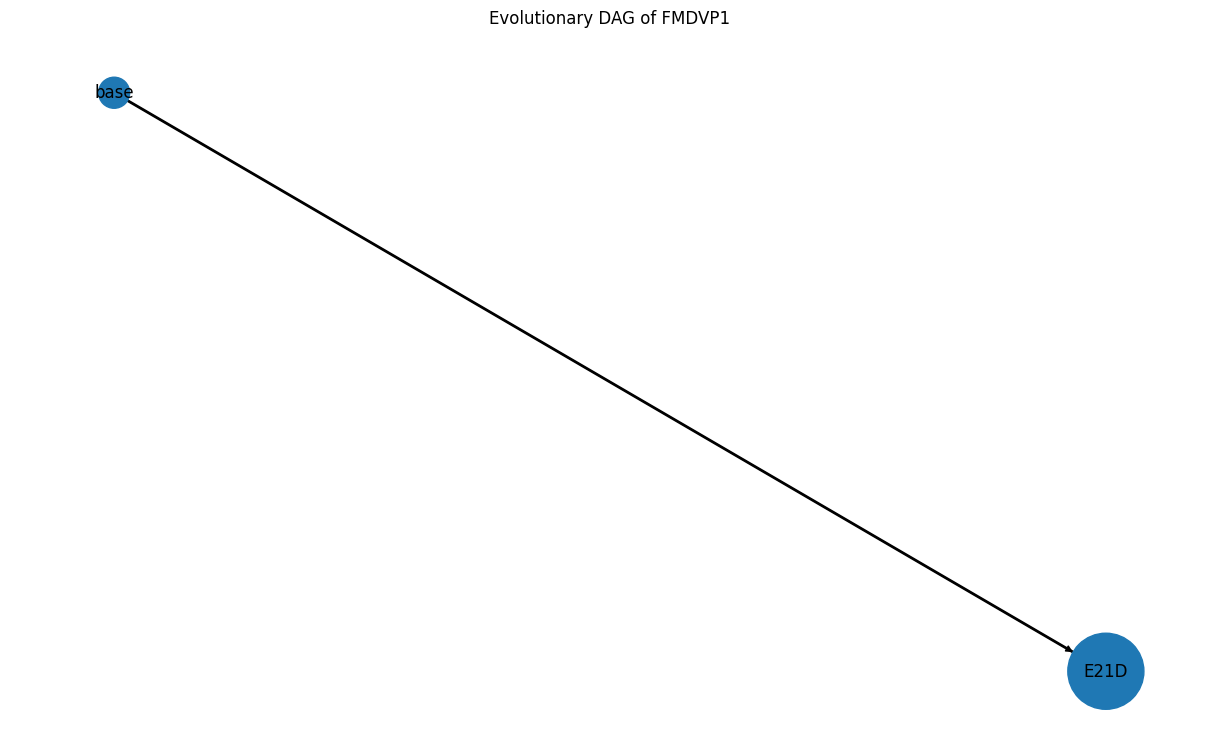

In [27]:
evolution.visualise_graph()

In [28]:
best_path = sorted_best_paths[0][1]
evolution.visualise_graph(best_path)

ValueError: max() arg is an empty sequence

In [ ]:
worst_path = sorted_best_paths[-1][1]
evolution.visualise_graph(worst_path)

## Evolution using Blosum-Weighted Logits Across 6 Highly Mutable Positions

In [ ]:
blosum_matrix = substitution_matrices.load("BLOSUM80") 
multiplier=0.5 # for weighting blosum penalty 

In [ ]:
fmd_sequence = ProteinSequence("base",reference_seq)
eval_strat = EvaluationStrategy(root_sequence=fmd_sequence)
mutation_strat = BlosumWeightedSub(mutations_per_seq=mutations_per_seq,blosum_matrix=blosum_matrix,multiplier=multiplier,start_pos=constrained_start,end_pos=constrained_end)
evolution = Evolution(
    root_sequence = fmd_sequence,
    mutation_strategy = mutation_strat,
    evaluation_strategy = eval_strat,
    max_generations=max_generations)
evolution.process_alignment_data(file_path) # process alignment data

In [ ]:
evolution.evolve_sequence()   

In [ ]:
evolution.visualise_graph()

In [ ]:
sorted_best_paths = evolution.get_best_paths_in_order() # paths to leaf nodes only
print(f"Number of paths generated: {len(sorted_best_paths)}") # sorted by mean mutation score for path

In [ ]:
best_path = sorted_best_paths[0][1]
evolution.visualise_graph(best_path)
evolution.evaluate_path_using_alignments(evolutionary_path=best_path)

In [ ]:
worst_path = sorted_best_paths[-1][1]
evolution.visualise_graph(worst_path)
evolution.evaluate_path_using_alignments(evolutionary_path=worst_path)

## Evolution using Blosum-Weighted Logits Across All 212 Positions

In [ ]:
fmd_sequence = ProteinSequence("base",reference_seq)
eval_strat = EvaluationStrategy(root_sequence = fmd_sequence)
mutation_strat = BlosumWeightedSub(mutations_per_seq=mutations_per_seq,blosum_matrix=blosum_matrix,multiplier=multiplier,start_pos=min_pos,end_pos=max_pos)
evolution = Evolution(
    root_sequence = fmd_sequence,
    mutation_strategy = mutation_strat,
    evaluation_strategy = eval_strat,
    max_generations=max_generations)

In [ ]:
evolution.evolve_sequence()   

In [ ]:
evolution.visualise_graph()

In [ ]:
sorted_best_paths = evolution.get_best_paths_in_order() # paths to leaf nodes only
print(f"Number of paths generated: {len(sorted_best_paths)}") # sorted by mean mutation score for path

In [ ]:
best_path = sorted_best_paths[0][1]
evolution.visualise_graph(best_path)

In [ ]:
worst_path = sorted_best_paths[-1][1]
evolution.visualise_graph(worst_path)

In [ ]:
# prior to changing should_continue_mutating from checking if sequence probability is increasing to checking if overall mutatioon score is increasing and using the minimum average logit score per position rather than the minimum aa logit value
# experiment observation: constraining positions for mutation increases length of evolution path  
# this is not surprising as mutating the position least favoured by the PLM != mutating the position that will yield an increase in sequence probability 
# replacing the current amino acid at the lowest logit position does not automatically increase the sequence probability 
# this is because it may choose a position where mutations are unlikely to happen at to begin  with (ie highly conserved regions) 
# thus leading to an overall decrease on the sequence probability and structure similarity
# When mutations are contrained to positions we know are highly variable from observed data, this aligns with the PLM's knowledge of existing mutations
# such that mutating these highly variable position can lead to higher probability sequences as it expects mutations to occur in these positions